### Naive Forecast Model

Use the current observation (t) to predict the observation at the next time step (t+1).
This is called the naive forecast or the persistence forecast and may be the best possible model on some time series forecast problems.

Test MSE: 83.766


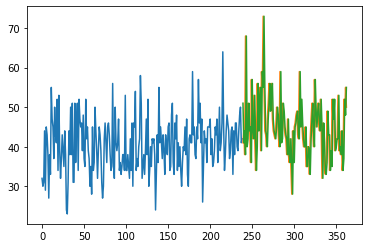

In [70]:
import pandas as pd
from matplotlib import pyplot
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


births = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv",
                     header=0, index_col=0, parse_dates=True, squeeze=True)

# Create lagged dataset
values = pd.DataFrame(births.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size+1:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()
